In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from utils.visualization_utils import perc, SetPlotRC, ApplyFont

import warnings
warnings.filterwarnings("ignore")

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# Deaner Experiment IM

In [3]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_Deaner_IM.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_Deaner_IM.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_Deaner_IM_V2.pkl")
df_PKIPW = pd.read_pickle(r"../Results/PKIPW_Deaner_IM.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_Deaner_IM_V2.pkl")
df_PMMR["Algorithm"] = "PMMR"

In [4]:
df_kernel_alternative_proxy.shape, df_kernel_negative_control.shape, df_PKIPW.shape, df_KPV.shape, df_PMMR.shape

((120, 10), (30, 7), (30, 7), (30, 7), (30, 7))

In [5]:
df_kernel_alternative_proxy_results_wrt_eta = pd.DataFrame(columns = ['Algorithm', 'eta_parameter', 'sigma_square', 'stage1_perc', 'Causal_MSE_mean', 'Causal_MSE_std'])

for eta_parameter in df_kernel_alternative_proxy["eta_parameter"].unique():
    for stage1_perc_ in df_kernel_alternative_proxy["stage1_perc"].unique():
        for sigma_sq in df_kernel_alternative_proxy["sigma_square"].unique():
            df_scale = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['eta_parameter'] == eta_parameter) & (df_kernel_alternative_proxy['stage1_perc'] == stage1_perc_) & (df_kernel_alternative_proxy['sigma_square'] == sigma_sq)]
        
            df_scale_dict = {
                "Algorithm" : "Kernel_Alternative_Proxy",
                "eta_parameter" : eta_parameter,
                "sigma_square" : sigma_sq, 
                "stage1_perc" : stage1_perc_,
                "Causal_MSE_mean" : df_scale["Causal_MSE"].mean(),
                "Causal_MSE_std" : df_scale["Causal_MSE"].std(),
            }
        
            df_kernel_alternative_proxy_results_wrt_eta = pd.concat([df_kernel_alternative_proxy_results_wrt_eta, pd.DataFrame([df_scale_dict])], ignore_index = True)

df_kernel_alternative_proxy_results_wrt_eta

,Algorithm,eta_parameter,sigma_square,stage1_perc,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Alternative_Proxy,learned,0.0,0.5,0.005823,0.001347
1,Kernel_Alternative_Proxy,learned,1.0,0.5,0.005113,0.000789
2,Kernel_Alternative_Proxy,learned,2.0,0.5,0.004762,0.000465
3,Kernel_Alternative_Proxy,learned,3.0,0.5,0.004779,0.000301


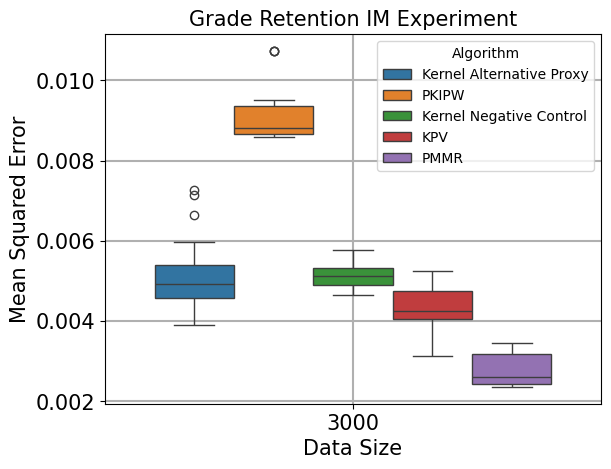

In [6]:
df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy["sigma_square"] == 1.]
df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['eta_parameter'] == 'learned']
df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel Alternative Proxy'
df_kernel_alternative_proxy_results_eta_fixed = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['eta_parameter'] != 'learned']
df_kernel_alternative_proxy_results_eta_fixed['Algorithm'] = 'Kernel Alternative Proxy (fixed eta)'
df_kernel_negative_control["Algorithm"] = "Kernel Negative Control"

df_results_IM = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
                        # df_kernel_alternative_proxy_results_eta_fixed,
                          df_PKIPW,
                          df_kernel_negative_control, 
                           df_KPV,
                          df_PMMR,
                      ],
                      axis = 0)

sns.boxplot(data=df_results_IM[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("Grade Retention IM Experiment", fontsize=10)
plt.grid(linewidth=1.5)
# plt.xticks(fontsize=5)
# plt.yticks(fontsize=5)
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
# plt.savefig('Figures/Alternative_Proxy_ATE_Deaner_Comparison.pdf', format='pdf')
plt.show()


In [7]:
df_results_IM.shape

(150, 10)

# Deaner Experiment IR

In [8]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_Deaner_IR.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_Deaner_IR.pkl")
df_PKIPW = pd.read_pickle(r"../Results/PKIPW_Deaner_IR.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_Deaner_IR_V2.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_Deaner_IR_V2.pkl")
df_PMMR["Algorithm"] = "PMMR"

In [9]:
df_kernel_alternative_proxy.shape, df_kernel_negative_control.shape, df_PKIPW.shape, df_KPV.shape, df_PMMR.shape

((120, 10), (30, 7), (30, 7), (30, 7), (30, 7))

In [10]:
df_kernel_alternative_proxy_results_wrt_eta = pd.DataFrame(columns = ['Algorithm', 'eta_parameter', 'sigma_square', 'stage1_perc', 'Causal_MSE_mean', 'Causal_MSE_std'])

for eta_parameter in df_kernel_alternative_proxy["eta_parameter"].unique():
    for stage1_perc_ in df_kernel_alternative_proxy["stage1_perc"].unique():
        for sigma_sq in df_kernel_alternative_proxy["sigma_square"].unique():
            df_scale = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['eta_parameter'] == eta_parameter) & (df_kernel_alternative_proxy['stage1_perc'] == stage1_perc_) & (df_kernel_alternative_proxy['sigma_square'] == sigma_sq)]
        
            df_scale_dict = {
                "Algorithm" : "Kernel_Alternative_Proxy",
                "eta_parameter" : eta_parameter,
                "sigma_square" : sigma_sq         ,
                "stage1_perc" : stage1_perc_,
                "Causal_MSE_mean" : df_scale["Causal_MSE"].mean(),
                "Causal_MSE_std" : df_scale["Causal_MSE"].std(),
            }
        
            df_kernel_alternative_proxy_results_wrt_eta = pd.concat([df_kernel_alternative_proxy_results_wrt_eta, pd.DataFrame([df_scale_dict])], ignore_index = True)

df_kernel_alternative_proxy_results_wrt_eta

,Algorithm,eta_parameter,sigma_square,stage1_perc,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Alternative_Proxy,learned,0.0,0.5,0.004091,0.002087
1,Kernel_Alternative_Proxy,learned,1.0,0.5,0.003298,0.001365
2,Kernel_Alternative_Proxy,learned,2.0,0.5,0.002731,0.000763
3,Kernel_Alternative_Proxy,learned,3.0,0.5,0.002459,0.000386


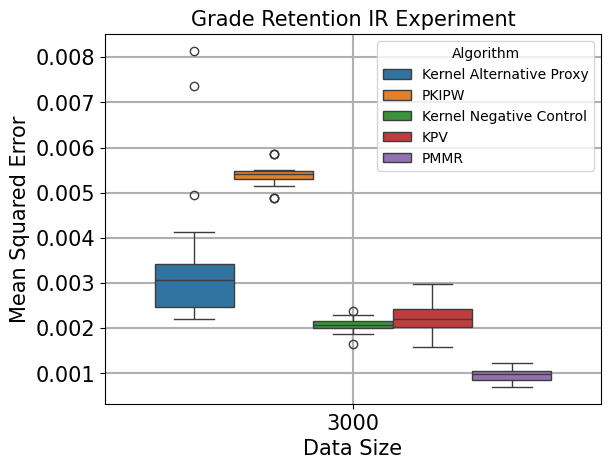

In [11]:
df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy["sigma_square"] == 1.]
df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['eta_parameter'] == 'learned']
df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel Alternative Proxy'
df_kernel_alternative_proxy_results_eta_fixed = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['eta_parameter'] != 'learned']
df_kernel_alternative_proxy_results_eta_fixed['Algorithm'] = 'Kernel Alternative Proxy (fixed eta)'
df_kernel_negative_control["Algorithm"] = "Kernel Negative Control"

df_results_IR = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
                           # df_kernel_alternative_proxy_results_eta_fixed,
                           df_PKIPW,
                           df_kernel_negative_control, 
                           df_KPV,
                           df_PMMR,
                      ],
                      axis = 0)

sns.boxplot(data=df_results_IR[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("Grade Retention IR Experiment", fontsize=10)
plt.grid(linewidth=1.5)
# plt.xticks(fontsize=5)
# plt.yticks(fontsize=5)
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
# plt.savefig('Figures/Alternative_Proxy_ATE_Deaner_Comparison_IR.pdf', format='pdf')
plt.show()


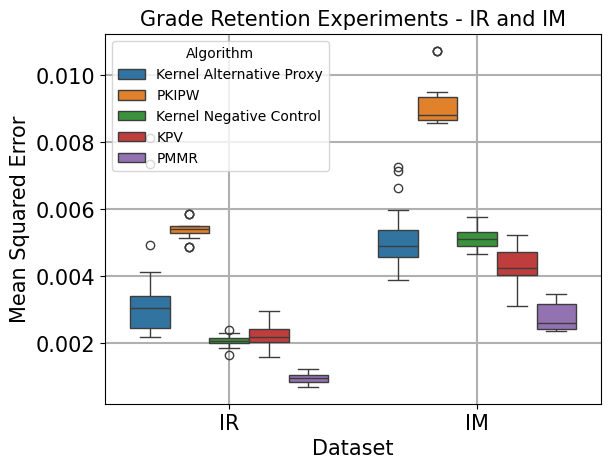

In [12]:
df_results_IR["id"] = "IR"
df_results_IM["id"] = "IM"
df_results = pd.concat([df_results_IR, df_results_IM], axis = 0)

sns.boxplot(data=df_results[["Algorithm", "id", "Causal_MSE"]], x='id', y='Causal_MSE', hue='Algorithm'
            # ,showfliers=False
           )
plt.xlabel("Dataset", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("Grade Retention Experiments - IR and IM", fontsize=10)
plt.grid(linewidth=1.5)
# plt.xticks(fontsize=5)
# plt.yticks(fontsize=5)
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
plt.savefig('Figures/Alternative_Proxy_ComplexityRegularized_ATE_Deaner_Comparison.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

# With $\sigma^2 = 3$ 

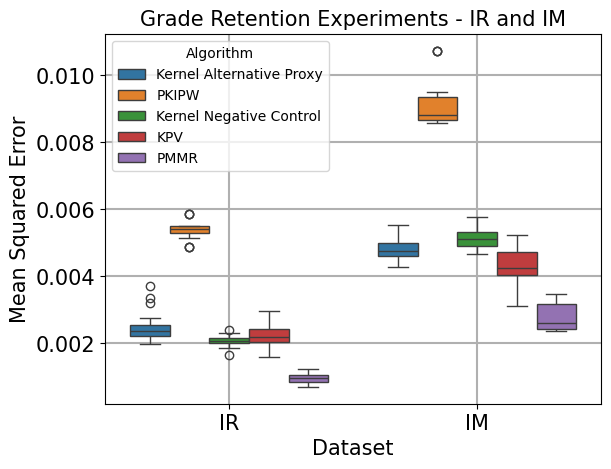

In [13]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_Deaner_IM.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_Deaner_IM.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_Deaner_IM_V2.pkl")
df_PKIPW = pd.read_pickle(r"../Results/PKIPW_Deaner_IM.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_Deaner_IM_V2.pkl")
df_PMMR["Algorithm"] = "PMMR"

df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy["sigma_square"] == 3.]
df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['eta_parameter'] == 'learned']
df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel Alternative Proxy'
df_kernel_negative_control['Algorithm'] = 'Kernel Negative Control'

df_results_IM = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
                          df_PKIPW,
                          df_kernel_negative_control, 
                           df_KPV,
                          df_PMMR,
                      ],
                      axis = 0)


df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_Deaner_IR.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_Deaner_IR.pkl")
df_PKIPW = pd.read_pickle(r"../Results/PKIPW_Deaner_IR.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_Deaner_IR_V2.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_Deaner_IR_V2.pkl")
df_PMMR["Algorithm"] = "PMMR"


df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy["sigma_square"] == 3.]
df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['eta_parameter'] == 'learned']
df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel Alternative Proxy'
df_kernel_negative_control['Algorithm'] = 'Kernel Negative Control'

df_results_IR = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
                           df_PKIPW,
                           df_kernel_negative_control, 
                           df_KPV,
                           df_PMMR,
                      ],
                      axis = 0)

df_results_IR["id"] = "IR"
df_results_IM["id"] = "IM"
df_results = pd.concat([df_results_IR, df_results_IM], axis = 0)

sns.boxplot(data=df_results[["Algorithm", "id", "Causal_MSE"]], x='id', y='Causal_MSE', hue='Algorithm'
            # ,showfliers=False
           )
plt.xlabel("Dataset", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("Grade Retention Experiments - IR and IM", fontsize=10)
plt.grid(linewidth=1.5)
# plt.xticks(fontsize=5)
# plt.yticks(fontsize=5)
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
plt.savefig('Figures/Alternative_Proxy_ComplexityRegularized_ATE_Deaner_Comparison_sigmasquare_is_3.pdf', format='pdf', bbox_inches = 'tight')
plt.show()